# Data Analysis on the Novel Corona Virus 

### Imports 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d,Axes3D
plt.rcParams['figure.figsize'] = [10, 25]


### Loading the dataset

In [2]:
dataset = pd.read_csv('A://Personal/Projects/CoronaVirus/2019_nCOV_data.csv')
dataset.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


### Checking for Missing values

In [3]:
dataset.isnull().any()

Sno               False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

##### Serial no is not required as it doesn't add any benefit.

In [4]:
dataset = dataset.drop('Sno',1)

##### The province/state feature has Nan values in the data. Assigning a new category named unkown.

In [5]:
dataset['Province/State'] = dataset['Province/State'].replace(np.nan,'unkown' , regex=True)

##### Since all the dates are in year 2020 and in januray thus only date is requred. Also the time variance is not much.
Taking the dates only

In [6]:
dates = []
for each_date in dataset['Last Update']:
   dates.append(each_date.split('/')[1])

##### Replacing the original column with new feature engineered one


In [7]:
dataset = dataset.drop('Last Update',1)
dataset['Date of January 2020'] = dates 

### Exploratory data analysis


In [8]:
sns.set(style="whitegrid")

##### Province 

##### Province/Satate vs cases confirmed

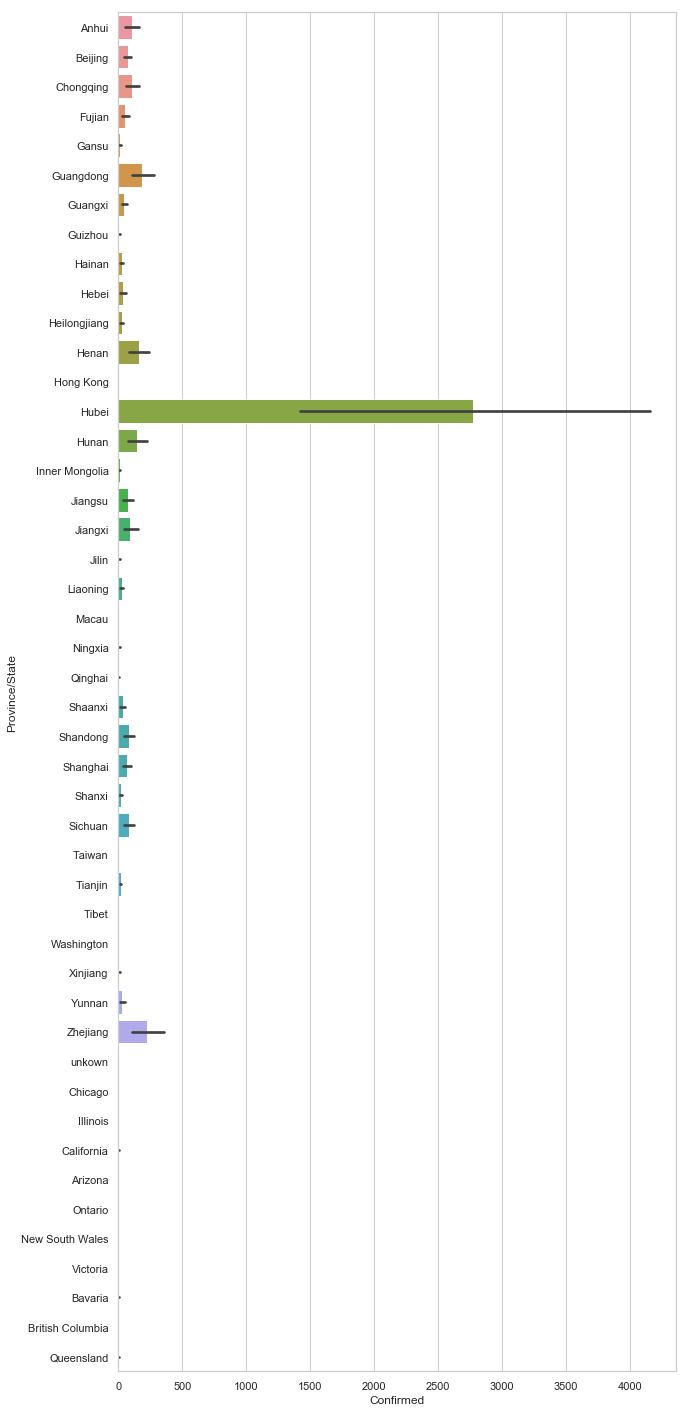

In [12]:
fig,ax = plt.subplots()
sns.barplot(dataset['Confirmed'],dataset['Province/State'])

##### Province/Satate vs cases of deaths

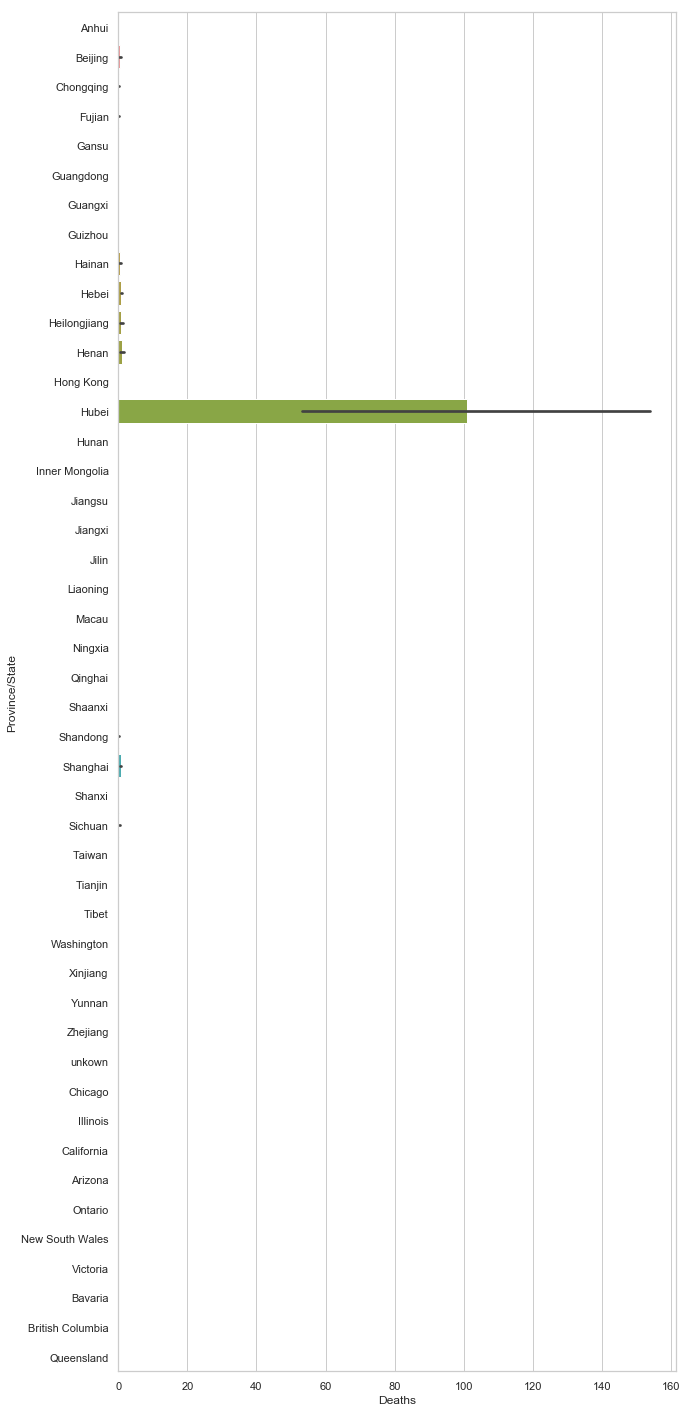

In [13]:
fig,ax = plt.subplots()
sns.barplot(dataset['Deaths'],dataset['Province/State'])

##### Province/Satate vs cases of recovered

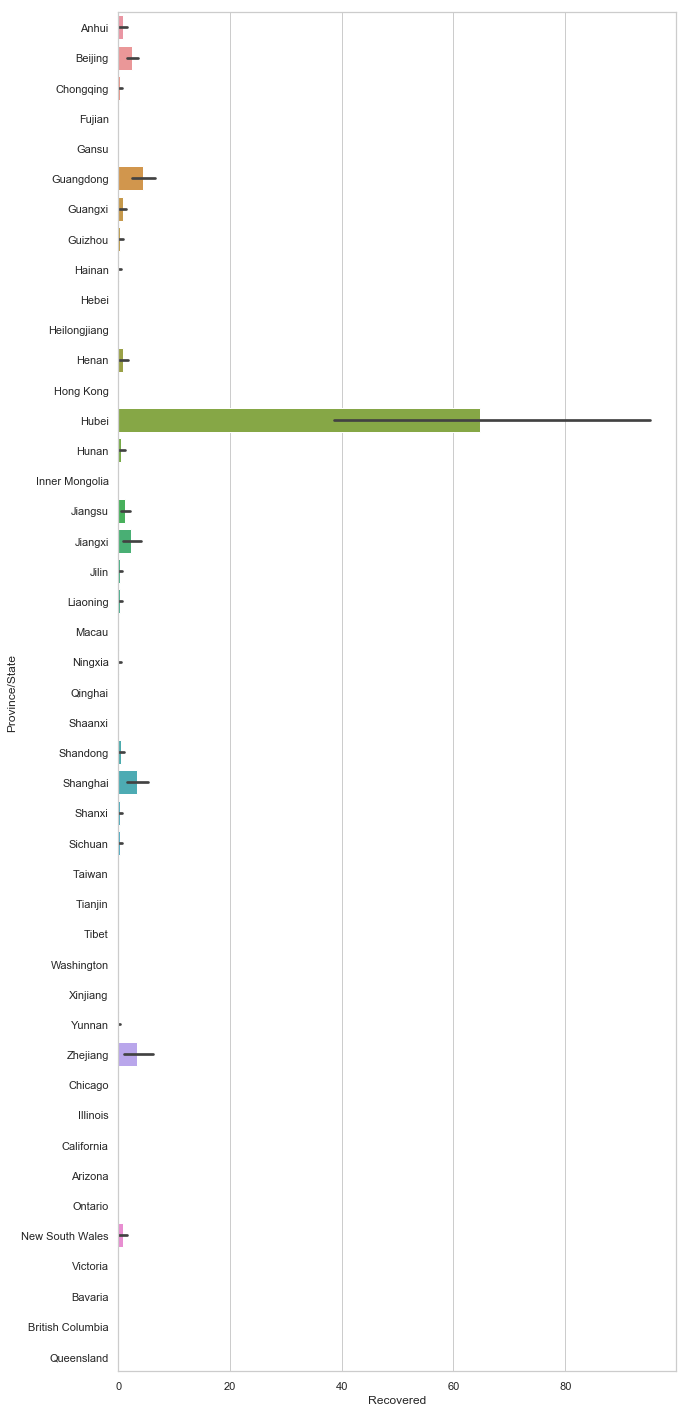

In [13]:
fig,ax = plt.subplots()
sns.barplot(dataset['Recovered'],dataset['Province/State'],)

##### Country

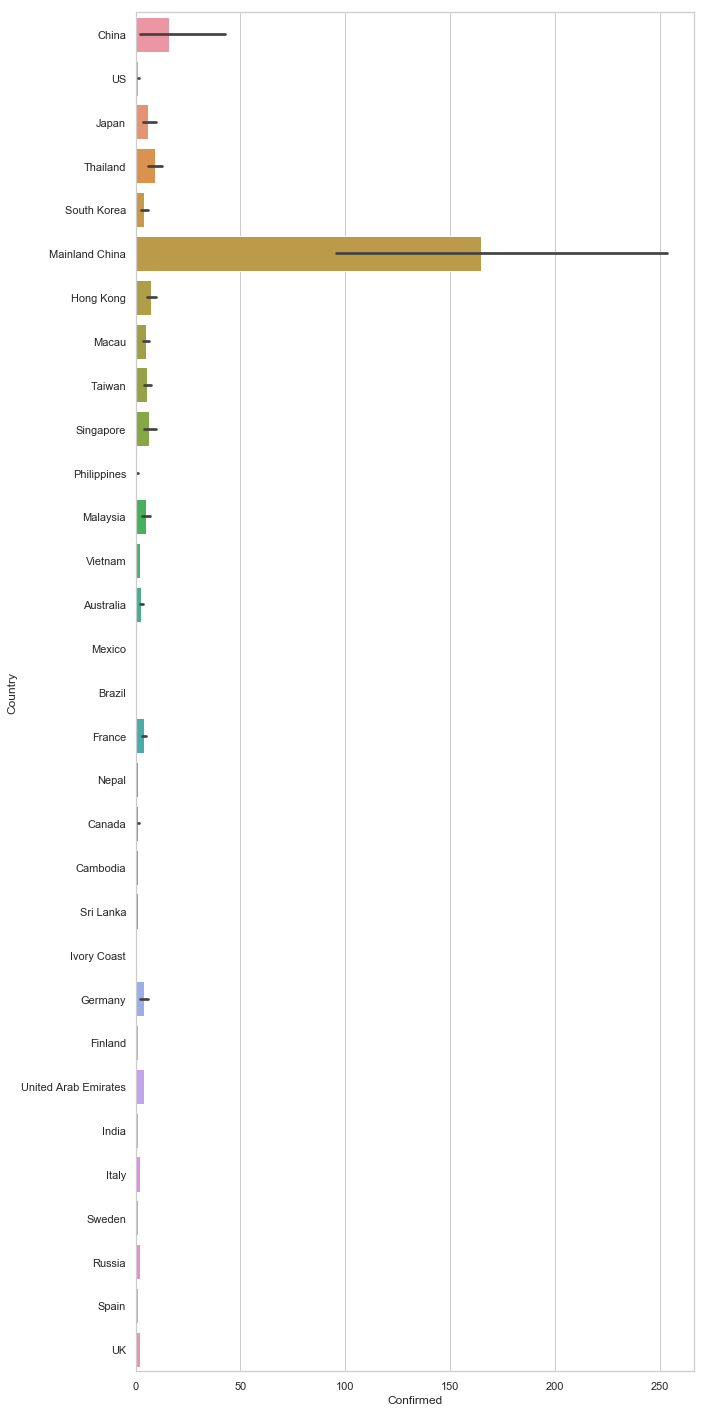

In [14]:
fig,ax = plt.subplots()
sns.barplot(dataset['Confirmed'],dataset['Country'])

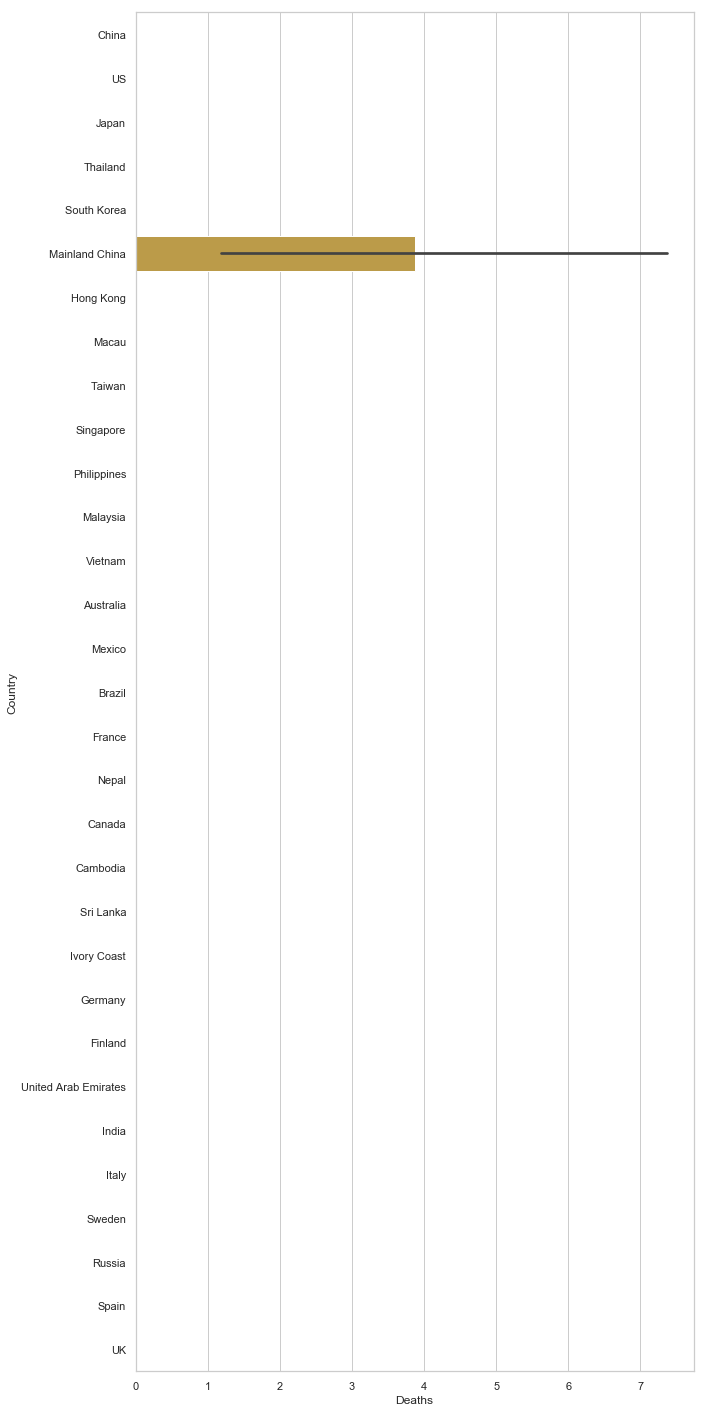

In [15]:
fig,ax = plt.subplots()
sns.barplot(dataset['Deaths'],dataset['Country'])

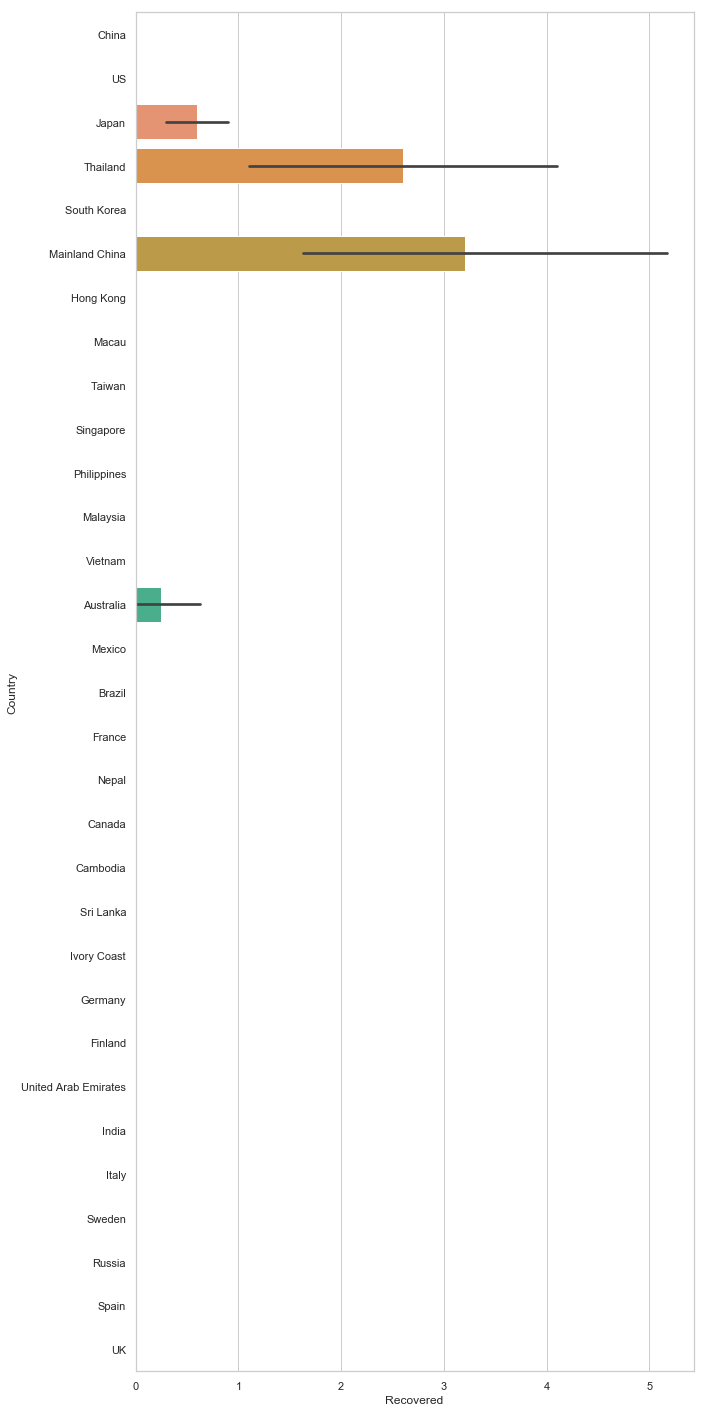

In [16]:
fig,ax = plt.subplots()
sns.barplot(dataset['Recovered'],dataset['Country'])

##### Date

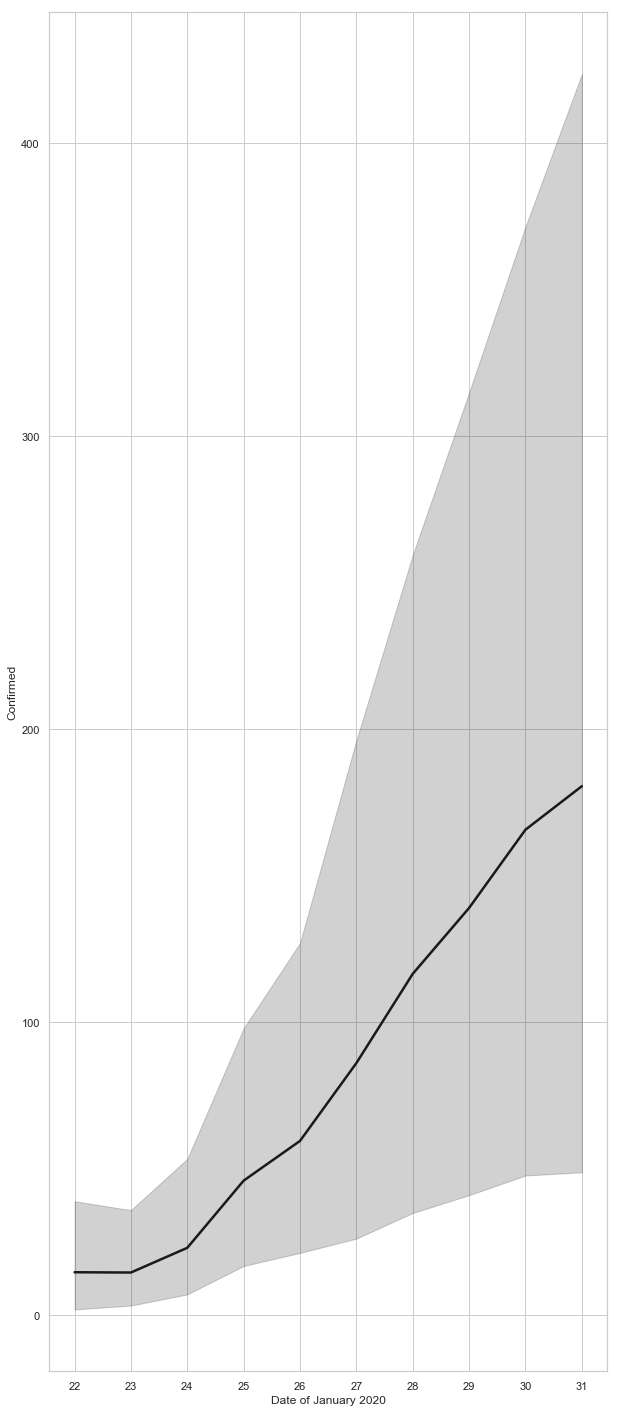

In [14]:
sns.lineplot(dataset['Date of January 2020'], dataset['Confirmed'],color='k',linewidth=2.5)

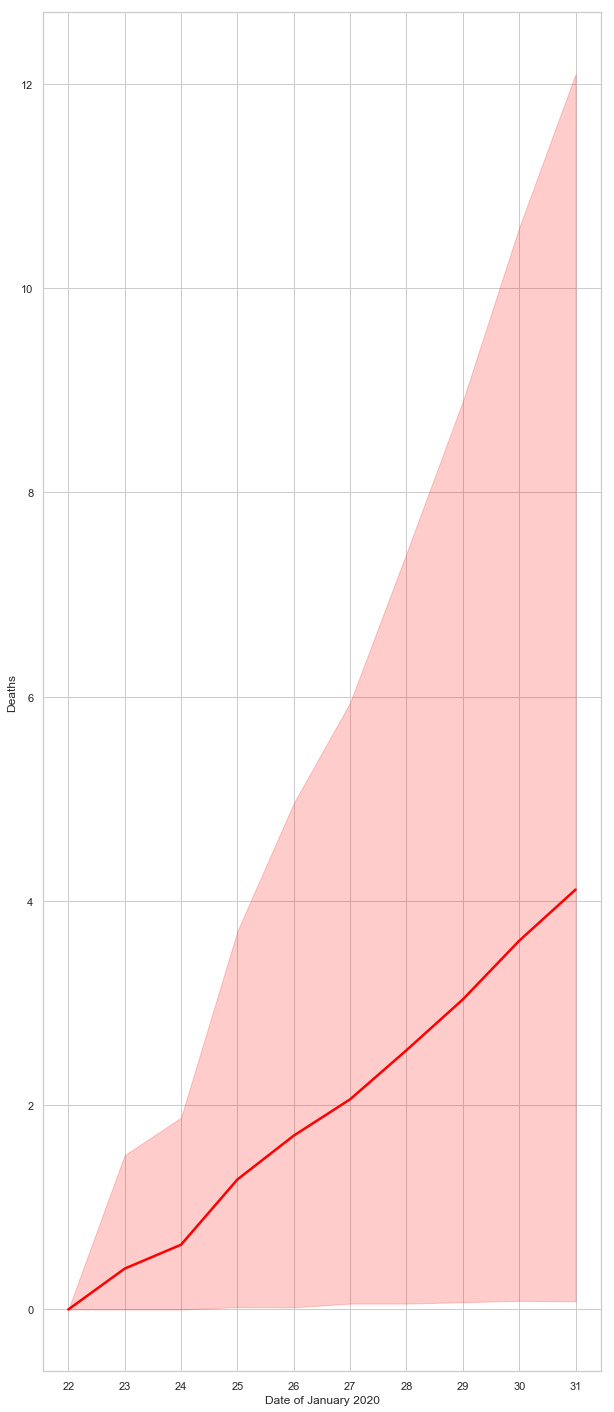

In [15]:
sns.lineplot(dataset['Date of January 2020'], dataset['Deaths'],color='red', linewidth=2.5)

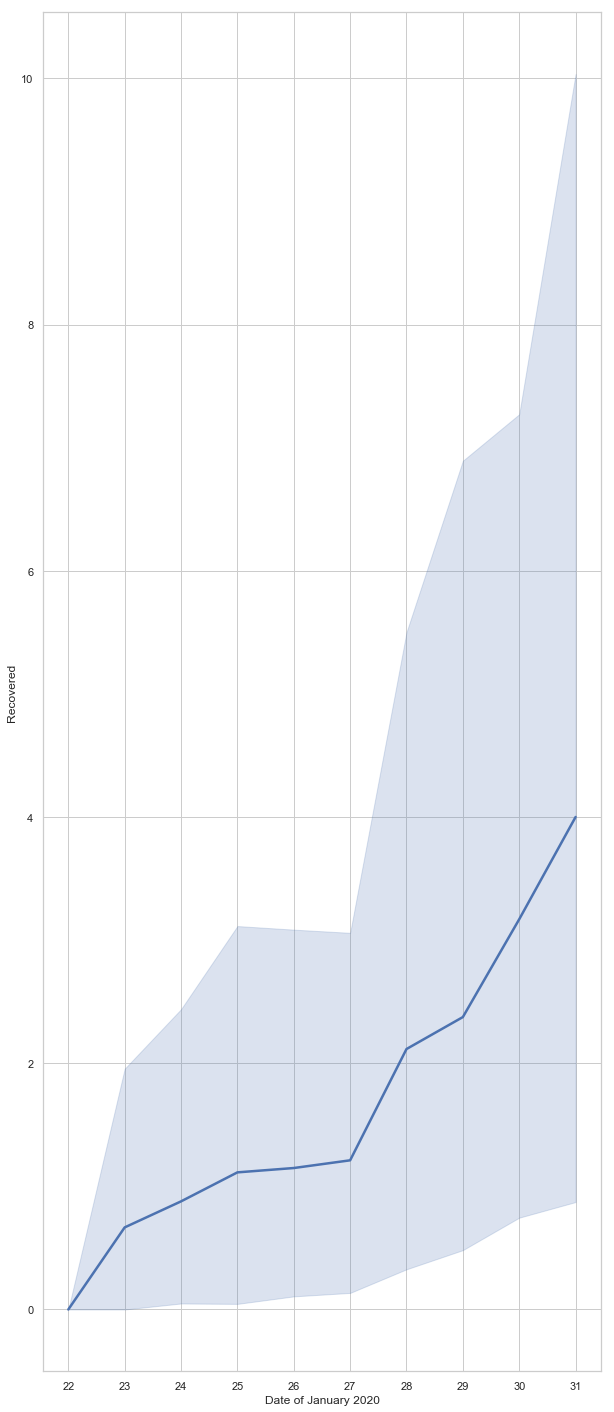

In [16]:
sns.lineplot(dataset['Date of January 2020'], dataset['Recovered'], linewidth=2.5)

Confirmed cases in total vs dates

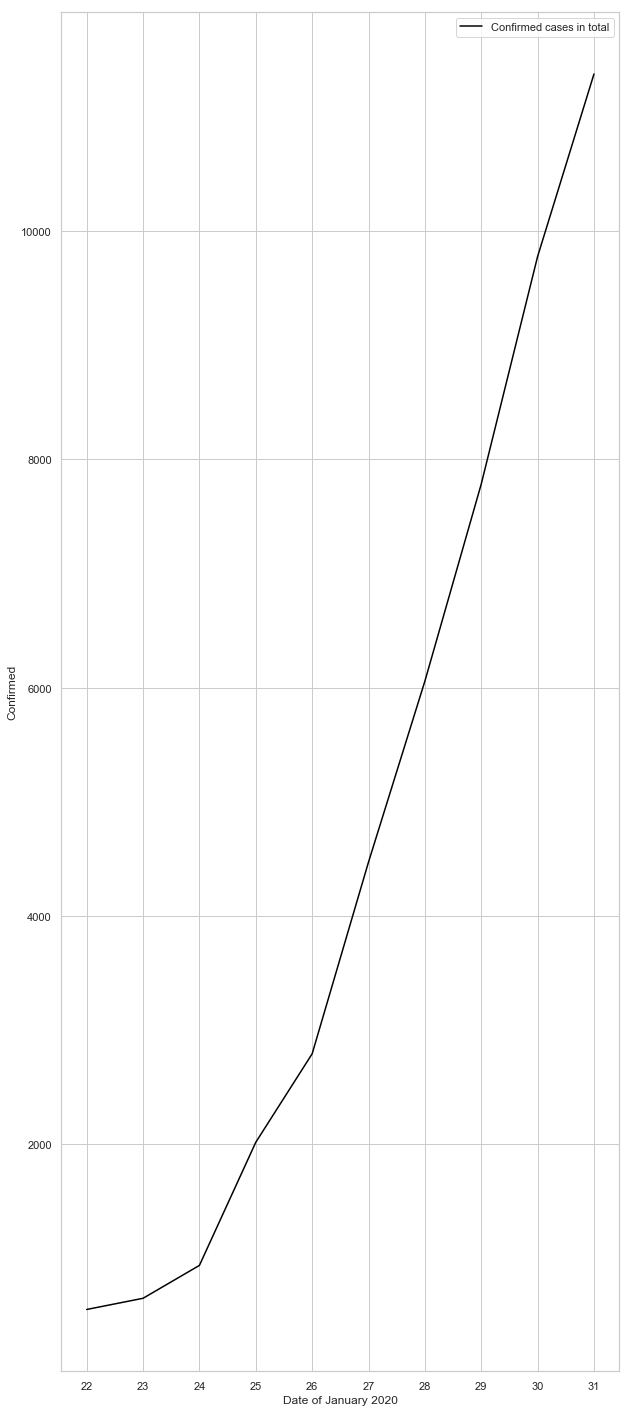

In [24]:
confirmed = dataset.groupby('Date of January 2020')['Confirmed'].sum().reset_index()
sns.lineplot(confirmed['Date of January 2020'],confirmed['Confirmed'], label = "Confirmed cases in total", color='black')

Deaths in the world on the basis of dates

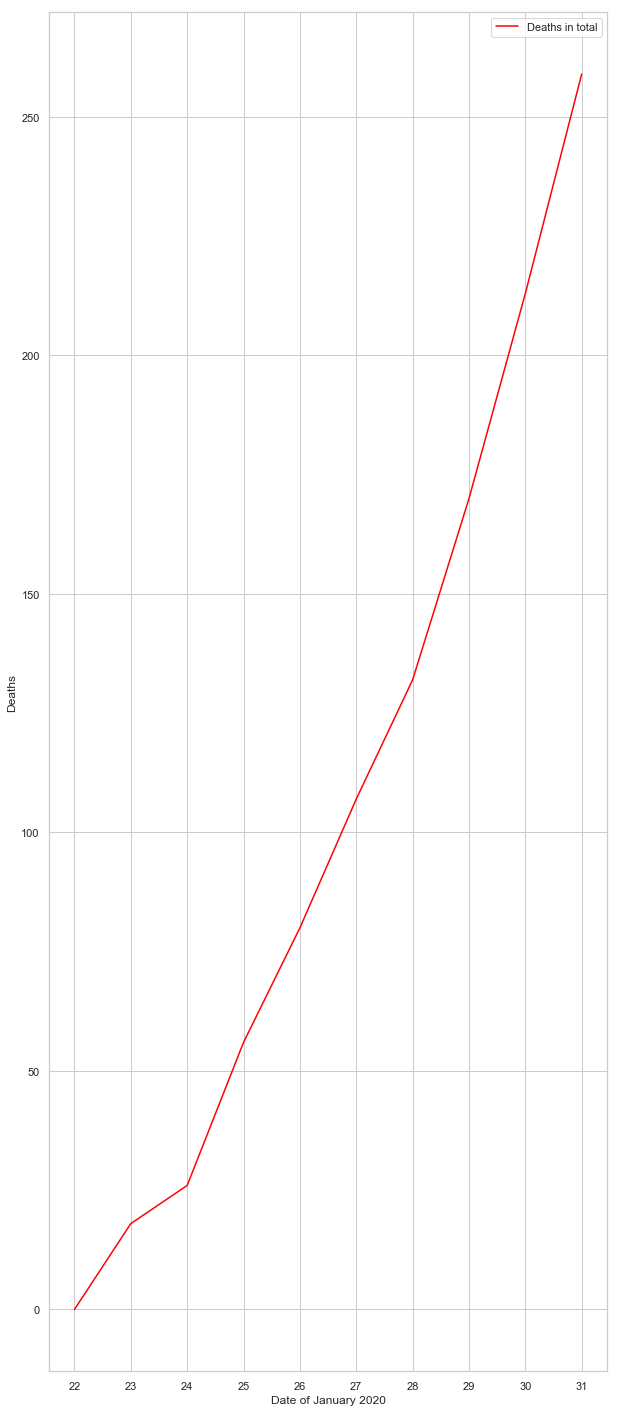

In [25]:
deaths = dataset.groupby('Date of January 2020')['Deaths'].sum().reset_index()
sns.lineplot(deaths['Date of January 2020'],deaths['Deaths'], label = "Deaths in total", color='red')

Recovery cases in total vs dates

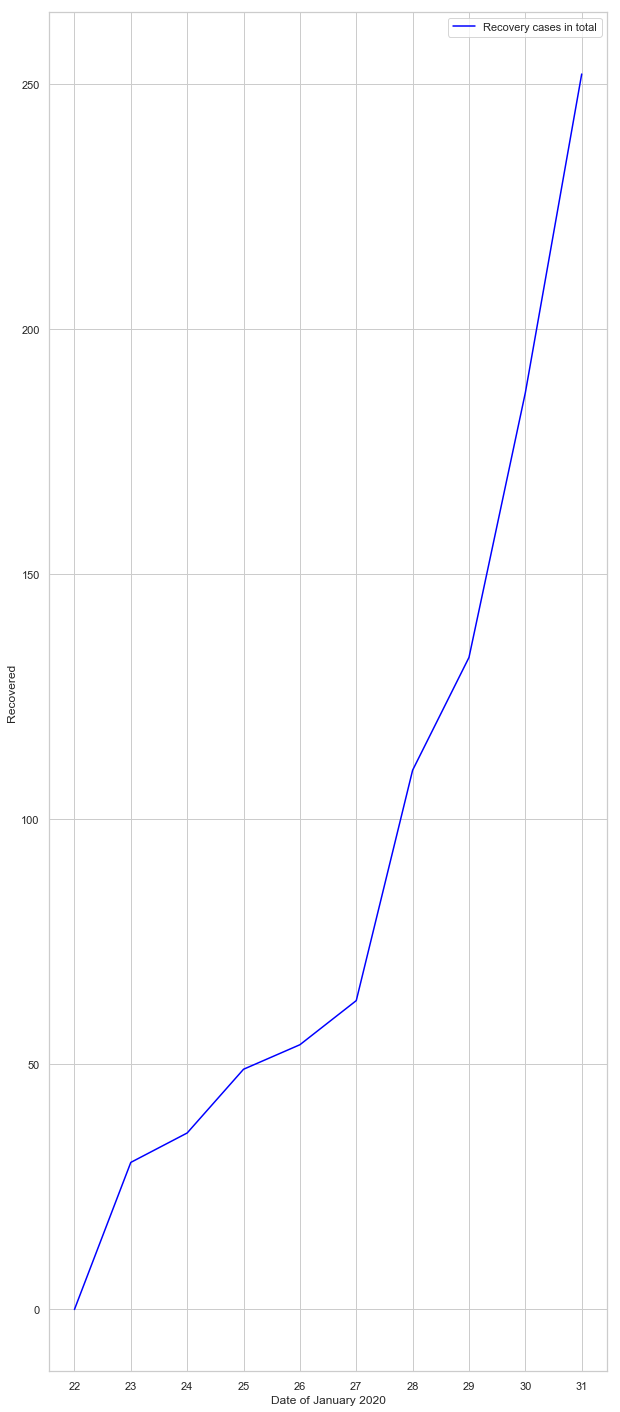

In [26]:
Recovered = dataset.groupby('Date of January 2020')['Recovered'].sum().reset_index()
sns.lineplot(Recovered['Date of January 2020'],Recovered['Recovered'], label = "Recovery cases in total", color='blue')

Aggregating

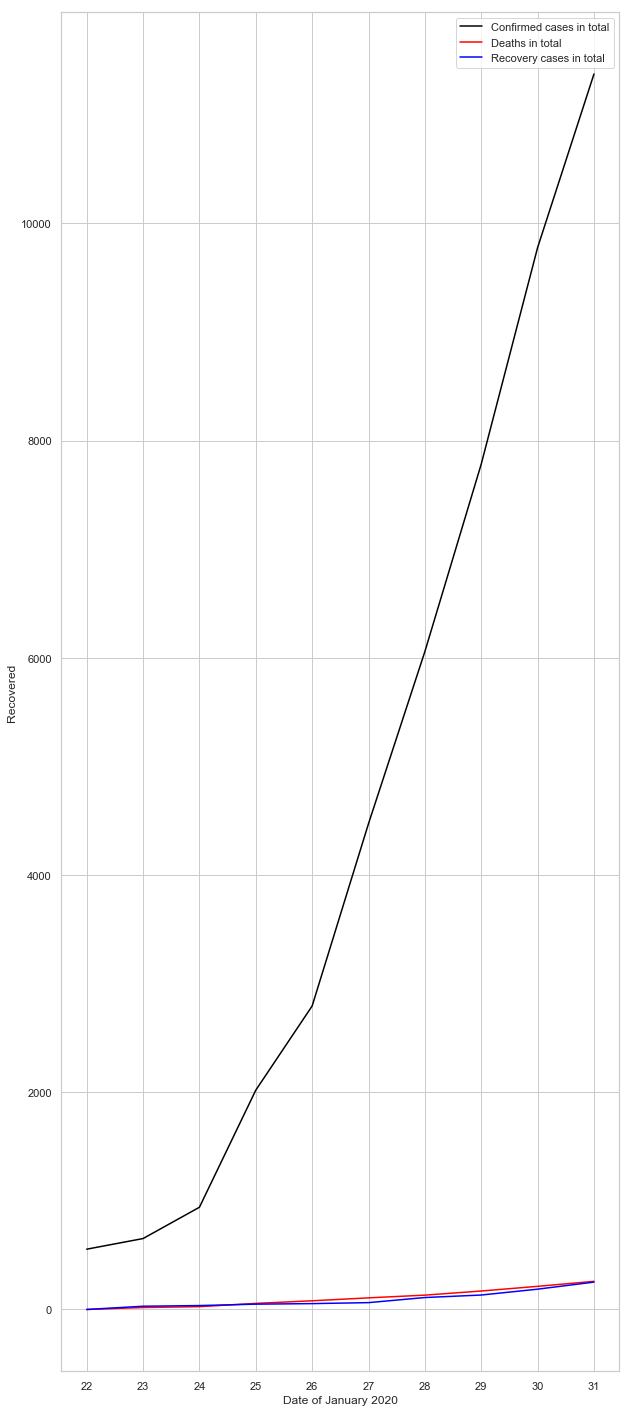

In [27]:
# Confirmed cases in total vs dates
confirmed = dataset.groupby('Date of January 2020')['Confirmed'].sum().reset_index()
sns.lineplot(confirmed['Date of January 2020'],confirmed['Confirmed'], label = "Confirmed cases in total", color='black')

# Deaths in the world on the basis of dates
deaths = dataset.groupby('Date of January 2020')['Deaths'].sum().reset_index()
sns.lineplot(deaths['Date of January 2020'],deaths['Deaths'], label = "Deaths in total", color='red')

# Recovery cases in total vs dates
Recovered = dataset.groupby('Date of January 2020')['Recovered'].sum().reset_index()
sns.lineplot(Recovered['Date of January 2020'],Recovered['Recovered'], label = "Recovery cases in total", color='blue')
plt.legend()

## This Porject is still being developed.